# INT303 Assignment 1: Web Scraping & Data Analysis
**Author:** Mingzirui Wu<br>
**Student ID:** 1930794
* <a href="#Data Scraping">Data Scraping</a>
* <a href="#Data Analysis Report">Data Analysis Report</a>

# <div id="Data Scraping"> 1- Data Scraping<div/>
Data exploration is one of the essential drivers in big data analysis[4].
Collecting the information about books on the website books.toscrape.com is the first step in this report. Moreover, the authors' information will be collected on google.com in the second phase of data scraping.

**The codes for Task 1:**

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

Base_URL = "https://books.toscrape.com/catalogue/page-{}.html"

book_urls = [] # Record the basic urls of books
titles = []
ratings = []
prices = []
reviewers_num = []
description = []
categories = []  # product types
nb_in_stock = []  # availability
product_type = []
ratings_dir = {
    'One' : 1,
    'Two' : 2,
    'Three' : 3,
    'Four' : 4,
    'Five' : 5,
}

#Tool functions
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

def getBooksURL(url):
    soup = getAndParseURL(url)
    return ["http://books.toscrape.com/catalogue/" + x.a.get('href') for x in soup.findAll("div", class_ ="image_container")]

def getAndParseURLwithHeader(url, head):
    result = requests.get(url, headers=head)
    soup = BeautifulSoup(result.content, 'html.parser')
    return(soup)


for i in range(1, 51):
    page_url = Base_URL.format(i)
    book_urls.extend(getBooksURL(page_url))
    # print(page_url)

for book_url in book_urls:
    bk_soup = getAndParseURL(book_url)

    title = bk_soup.find("li", class_ = "active").text
    titles.append(title)
    ratings.append(ratings_dir.get(bk_soup.find("p", class_ = "star-rating")["class"][1]))
    prices.append((float)(bk_soup.find("p", class_ = "price_color").text[2:]))
    nb_in_stock.append((int)(re.sub("[^0-9]", "", bk_soup.find("p", class_ = "instock availability").text)))
    categories.append(bk_soup.find("a", href = re.compile("../category/books/")).get("href").split("/")[3].split('_')[0])
    description.append(bk_soup.findAll("p")[3].text)
    reviewers_num.append((int)(bk_soup.find("table", class_ = "table table-striped").findAll("td")[6].text))
    product_type.append((bk_soup.find("table", class_ = "table table-striped").findAll("td")[1].text))

    print(book_url,"normal information finished")

http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html normal information finished
http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html normal information finished
http://books.toscrape.com/catalogue/soumission_998/index.html normal information finished
http://books.toscrape.com/catalogue/sharp-objects_997/index.html normal information finished
http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html normal information finished
http://books.toscrape.com/catalogue/the-requiem-red_995/index.html normal information finished
http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html normal information finished
http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html normal information finished
http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-193

In [2]:
scraped_data = pd.DataFrame({'title':titles, 'price': prices, 'nb_in_stock': nb_in_stock, "reviewers_num": reviewers_num, "rating":ratings, "product_category": categories, "product_type":product_type, "description": description})

In [3]:
scraped_data.to_csv('scrape_new.csv') # Basic information without extra information

# Bonus (Extra Information about authors):
We have now completed all the essential information in the book. ***GoodReads.com*** and ***Google.com*** were used to find information about the author. After getting a large number of author names from GoodReads (940 or so), we used the search results on Google to fill in the gaps. Firstly, we mimicked a dummy head, 'Mozilia' to evade the anti-crawl mechanism. Second, we can get the author's name through Google's automatic recommendation algorithm. Thirdly, suppose that Google does not output the answer directly. In this case, we will automatically select a second keyword, usually the author's biography.

In [4]:
from urllib.parse import quote, quote_plus


def getSingleAuthorGoogleURL(bookTitle):
    return "https://www.google.com.hk/search?q=" + quote_plus("Author of " + bookTitle, "latin-1")

def getGoodReads(bookTitle):
  return "https://www.goodreads.com/search?q=" + quote_plus(bookTitle, "latin-1")

def getAndParseURLwithHeader(url, head):
    result = requests.get(url, headers=head)
    soup = BeautifulSoup(result.content, 'html.parser')
    return(soup)

In [5]:
#Extra information
author = []
author_no = []

for title in titles:
  url = getGoodReads(title)
  soup = getAndParseURL(url)
  trs = soup.find_all('tr')

  names = []
  name_list_str = None
  try:
    for name in trs[0].find_all('a', class_='authorName'):
      names.append(name.text)
    name_list_str = ', '.join(str(name)for name in names)
    print("[", title, "]", name_list_str)
  except IndexError:
    author_no.append(titles.index(title))
    print(title,"Error")
  author.append(name_list_str)

[ A Light in the Attic ] Shel Silverstein
[ Tipping the Velvet ] Sarah Waters
[ Soumission ] Michel Houellebecq
[ Sharp Objects ] Gillian Flynn
[ Sapiens: A Brief History of Humankind ] Yuval Noah Harari
[ The Requiem Red ] Brynn Chapman
[ The Dirty Little Secrets of Getting Your Dream Job ] Don Raskin
[ The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull ] Karen J. Hicks
[ The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics ] Daniel James Brown
[ The Black Maria ] Aracelis Girmay
[ Starving Hearts (Triangular Trade Trilogy, #1) ] Janine Mendenhall
[ Shakespeare's Sonnets ] William Shakespeare
[ Set Me Free ] Ann Clare LeZotte
[ Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) ] Bryan Lee O'Malley
[ Rip it Up and Start Again ] Simon Reynolds
[ Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 ] Michael Azerrad
[ Olio ] Tyehimba Jess
[ Mesaerion: The Best Science Fictio

We need to find miss value for author.

In [6]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

for idx in author_no:
  title = titles[idx].split('(')[0]
  google_url = getSingleAuthorGoogleURL(title)
  soup = getAndParseURLwithHeader(google_url, HEADERS)
  try:
      name_test = title
      try:
          name_test = soup.find("div", "BNeawe iBp4i AP7Wnd").getText()
          print("for", google_url,"the author is", name_test)
      except AttributeError:
          name_test = soup.find("div", "BNeawe deIvCb AP7Wnd").getText()
          print("[FAILED?]", "for", google_url,"the author is", name_test)
      author[idx] = name_test
  except:
      print("fail", title)

[FAILED?] for https://www.google.com.hk/search?q=Author+of+Worlds+Elsewhere%3A+Journeys+Around+Shakespeare%C3%A2%C2%80%C2%99s+Globe the author is Andrew Dickson
[FAILED?] for https://www.google.com.hk/search?q=Author+of+Untitled+Collection%3A+Sabbath+Poems+2014 the author is Images
for https://www.google.com.hk/search?q=Author+of+Saga%2C+Volume+6+ the author is Brian K. Vaughan
for https://www.google.com.hk/search?q=Author+of+Saga%2C+Volume+5+ the author is Brian K. Vaughan
for https://www.google.com.hk/search?q=Author+of+Rat+Queens%2C+Vol.+3%3A+Demons+ the author is Kurtis J. Wiebe
[FAILED?] for https://www.google.com.hk/search?q=Author+of+Princess+Jellyfish+2-in-1+Omnibus%2C+Vol.+01+ the author is Images
[FAILED?] for https://www.google.com.hk/search?q=Author+of+Lumberjanes%2C+Vol.+2%3A+Friendship+to+the+Max+ the author is Lumberjanes Vol. 2
fail Lumberjanes, Vol. 1: Beware the Kitten Holy 
[FAILED?] for https://www.google.com.hk/search?q=Author+of+Lumberjanes+Vol.+3%3A+A+Terrible+Pl

In [7]:
scraped_data['author'] = author
scraped_data.to_csv('Mingzirui_Wu_1930794.csv') # All the information, inculding the extra info of authors.

In [8]:
scraped_data.head(10)

,title,price,nb_in_stock,reviewers_num,rating,product_category,product_type,description,author
0,A Light in the Attic,51.77,22,0,3,poetry,Books,It's hard to imagine a world without A Light i...,Shel Silverstein
1,Tipping the Velvet,53.74,20,0,1,historical-fiction,Books,"""Erotic and absorbing...Written with starling ...",Sarah Waters
2,Soumission,50.10,20,0,1,fiction,Books,"Dans une France assez proche de la nÃ´tre, un ...",Michel Houellebecq
3,Sharp Objects,47.82,20,0,4,mystery,Books,"WICKED above her hipbone, GIRL across her hear...",Gillian Flynn
4,Sapiens: A Brief History of Humankind,54.23,20,0,5,history,Books,From a renowned historian comes a groundbreaki...,Yuval Noah Harari
5,The Requiem Red,22.65,19,0,1,young-adult,Books,Patient Twenty-nine.A monster roams the halls ...,Brynn Chapman
6,The Dirty Little Secrets of Getting Your Dream...,33.34,19,0,4,business,Books,Drawing on his extensive experience evaluating...,Don Raskin
7,The Coming Woman: A Novel Based on the Life of...,17.93,19,0,3,default,Books,"""If you have a heart, if you have a soul, Kare...",Karen J. Hicks
8,The Boys in the Boat: Nine Americans and Their...,22.60,19,0,4,default,Books,For readers of Laura Hillenbrand's Seabiscuit ...,Daniel James Brown
9,The Black Maria,52.15,19,0,1,poetry,Books,"Praise for Aracelis Girmay:""[Girmay's] every l...",Aracelis Girmay


In [9]:
# Remove unnecessary information, parpare for Task 2.
del titles, ratings, prices, reviewers_num, description, categories, nb_in_stock, product_type, book_urls, author, author_no, scraped_data

# Task 2

# Topic: Which high-quality books should people read?
As a book lover, reading quality books makes one more convincing in literary discussions. And quality is not only reflected in the rating but **the price range of the book** (if it is too cheap, it is not unique enough, if it is too expensive, it seems pretentious), **the category** (too hot a category may represent too popular a taste and too cold a category without fellow readers), **the number of copies in stock** (which may indirectly suggest how well the book is selling), etc. all influence the quality of the book.<br>
In summary, high-scoring books in less popular categories have more potential for high quality than high-scoring books in popular categories.
# <div id="Data Analysis Report"> 2- Data Analysis Report (**Methods**)<div/>
This report aims to demonstrate a data analysis approach for people who decide to buy high-quality books on books.toscrape.com.Ather collecting all the information on the website, which is implemented by the code above.
In the second step, this report will analyze books by their digital information (number of reviews, rating, price, product type, book category, and availability) and choose high-quality books. This process aims to excavate more information about the original data so that people prepare to intensify the efficiency [1] based on the data and information this report provides.
At the end of the report, there will be an example of how a student uses the analyzed data to find suitable books.
#### Load csv file
reviewers_num = * <a href="#number of reviews">number of reviews</a>,<br>
price = * <a href="#price">price of the book</a>,<br>
product_category = * <a href="#book category">category of the book</a>,<br>
rating = * <a href="#rating">ranking level</a>,<br>
product_type = * <a href="#product type">product type of the book</a><br>
nb_in_stock = * <a href="#availability">number of books in stock</a><br>

In order to analyze the quality of the collection on this website, a range of data analysis techniques are used, the main one being data visualization. The information collected is cleaned and then visualized.
Visualizations include, but are not limited to, **pie charts**, **violin charts**, **bar charts**, and **scatter charts**.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

books_data = pd.read_csv('./Mingzirui_Wu_1930794.csv', index_col='Unnamed: 0')

In [11]:
books_data.head(5)

,title,price,nb_in_stock,reviewers_num,rating,product_category,product_type,description,author
0,A Light in the Attic,51.77,22,0,3,poetry,Books,It's hard to imagine a world without A Light i...,Shel Silverstein
1,Tipping the Velvet,53.74,20,0,1,historical-fiction,Books,"""Erotic and absorbing...Written with starling ...",Sarah Waters
2,Soumission,50.10,20,0,1,fiction,Books,"Dans une France assez proche de la nÃ´tre, un ...",Michel Houellebecq
3,Sharp Objects,47.82,20,0,4,mystery,Books,"WICKED above her hipbone, GIRL across her hear...",Gillian Flynn
4,Sapiens: A Brief History of Humankind,54.23,20,0,5,history,Books,From a renowned historian comes a groundbreaki...,Yuval Noah Harari


In [12]:
books_data.isnull().sum()

title                0
price                0
nb_in_stock          0
reviewers_num        0
rating               0
product_category     0
product_type         0
description          0
author              11
dtype: int64

### <div id="#book category">1. Category of the book<div/>
The bar chart [2] (Category VS Inventory) below compares the number of books in the different categories of the collection when stock levels are calculated. Another bar chart (Category Counter) below shows the number of categories (the number of books in the library per book is not included).

Comparing these two charts shows that although the site includes slightly more books under the add-a-comment category than fiction, fiction has a more enormous inventory than add-a-comment. More fiction books mean that books in this category are likely to be more of a bestseller/lagging seller than books in add-a-comment.

In [13]:
# category & stock
cate_dir = {}
cate_list = books_data.product_category.unique().tolist()
for item in cate_list:
    cate_dir[item] = 0
cate_stock_data = books_data[["product_category", "nb_in_stock"]]
cate_stock_data.sort_values("product_category")
for idx, row in cate_stock_data.iterrows():
    cate_dir[row["product_category"]] = cate_dir[row["product_category"]] + row["nb_in_stock"]
    # print(row["product_category"], row["nb_in_stock"])
dir_to_csv = pd.DataFrame(list(cate_dir.items()))

del cate_dir, cate_list, cate_stock_data

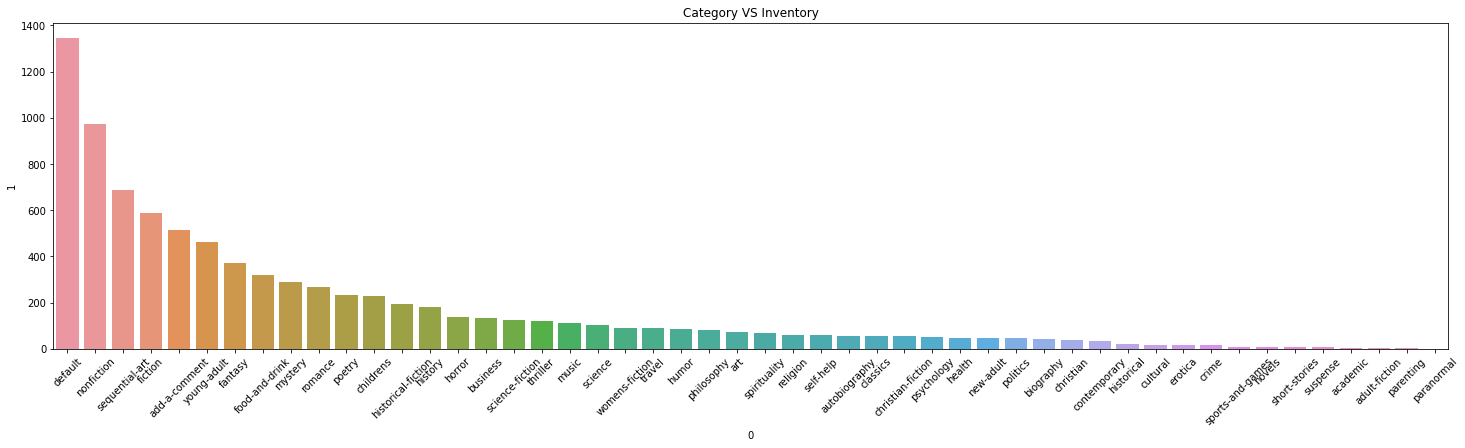

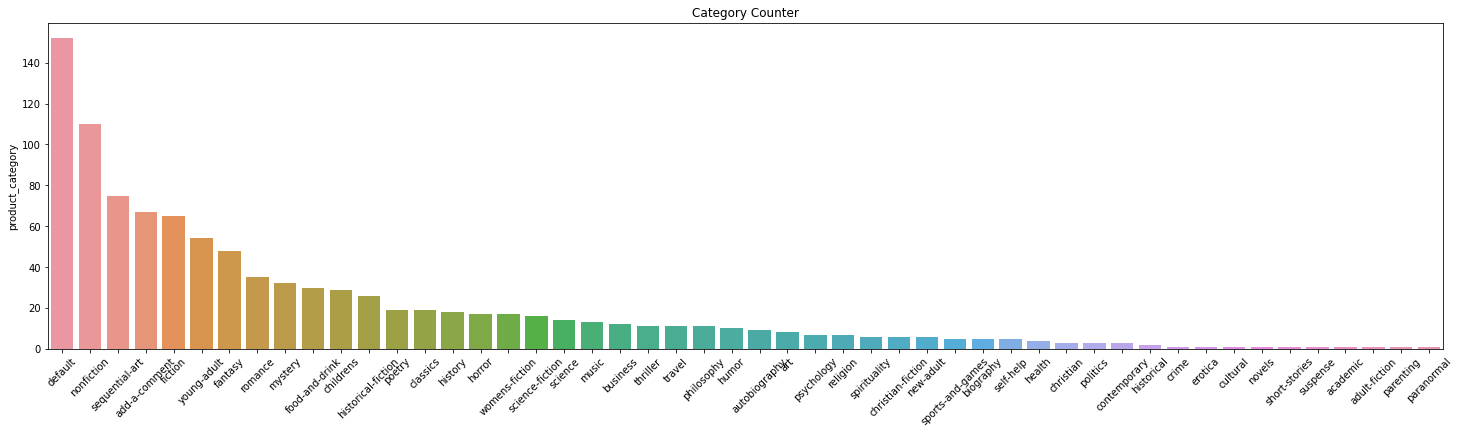

In [14]:
# Statistics on the number of books with different types in the collection
fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
cate_rat = sns.barplot(ax=ax, x=0, y=1, data=dir_to_csv.sort_values(1, ascending=False))
cate_rat.set_title("Category VS Inventory")
cate_rat.set_xticklabels(cate_rat.get_xticklabels(), rotation=45)
None
del dir_to_csv

# Statistics on the number of types of books in the collection
fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
cate_num = sns.barplot(ax=ax, x=books_data.product_category.value_counts().index, y=books_data.product_category.value_counts())
cate_num.set_title("Category Counter")
cate_num.set_xticklabels(cate_num.get_xticklabels(), rotation=45)
None

### Relationship between price, rating and category
The scatter plot [3] of the three variables aims to find different price densities of different categories.

Text(0.5, 1.0, 'Relationship between price, rating and category')

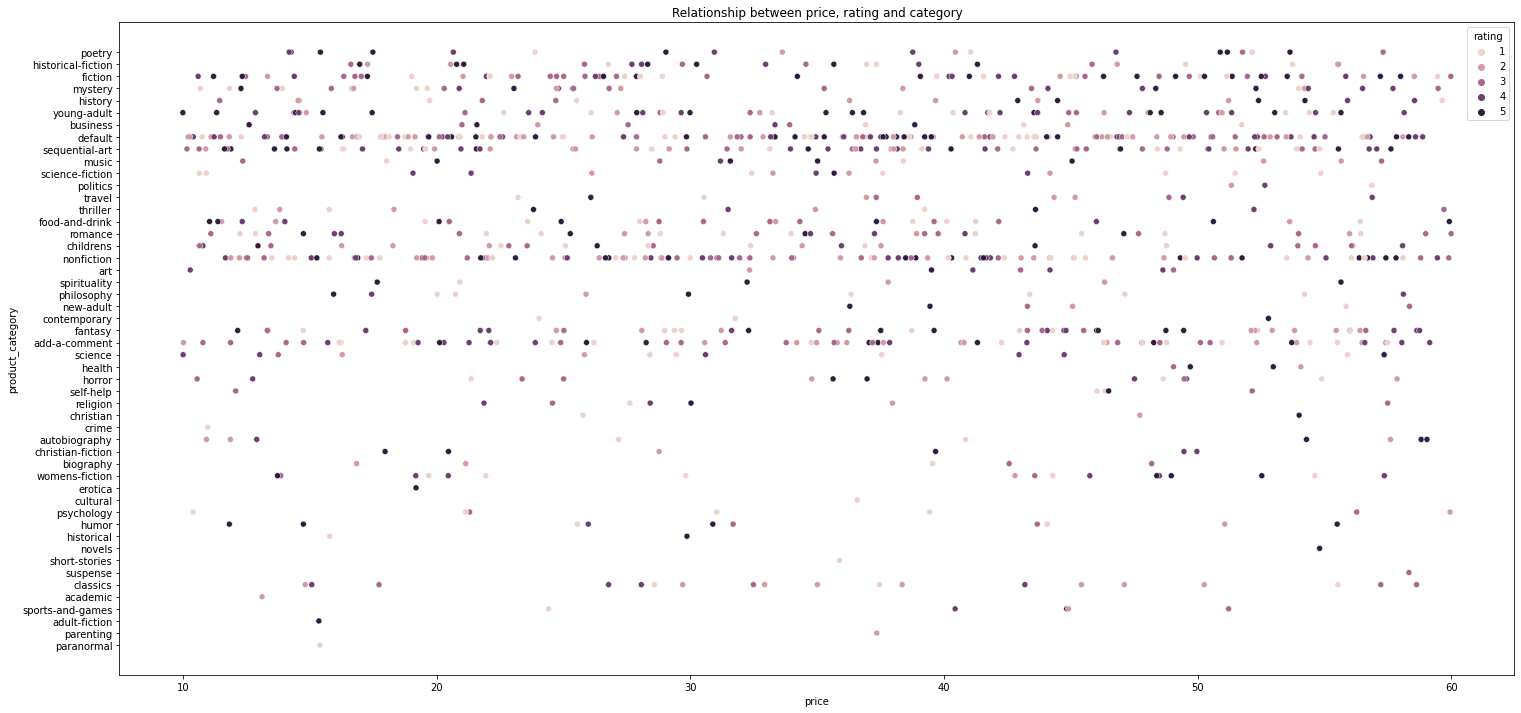

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(25,12)
sns.scatterplot(ax=ax, x=books_data.price, y=books_data.product_category, hue=books_data.rating).set_title("Relationship between price, rating and category")

# px.scatter(data_frame=books_data.sort_values("product_category"), x="price", y="product_category", color="rating", height=1000) # if height < 1000, cannot show all the categories.

### <div id="#rating">2. Ranking level of the book<div/>

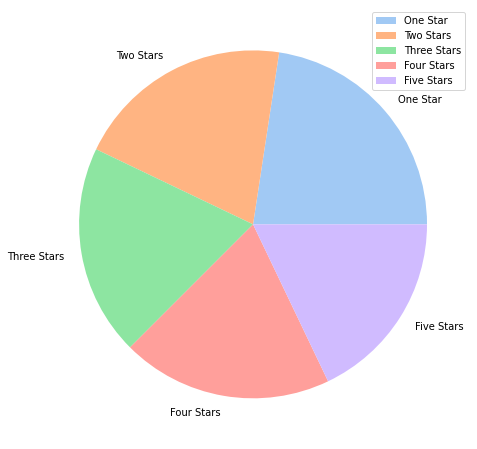

In [16]:
# rating_fig = px.pie(books_data, names='rating', color="rating")
# rating_fig.show()
stars = books_data.rating.value_counts()
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 8))
plt.pie(stars, labels=['One Star', 'Two Stars', 'Three Stars', 'Four Stars', 'Five Stars'], colors = colors)
plt.legend()
plt.show()

### <div id="#product type">3. Product type of the book<div/>
Inventory? Price? Category? Number of reviewers? Product Type?
While there is only one product type(book), there is no need to analysis it.

In [17]:
books_data.product_type.unique()

array(['Books'], dtype=object)

### <div id="#number of reviews">4. Number of reviews of the book<div/>
All the numbers of reviewer is zero.

In [18]:
books_data.reviewers_num.describe()

count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: reviewers_num, dtype: float64

### What are the factors that influence the rating?
The violin plots[5] below demonstrate the peaks at different prices and inventories at different levels.

Text(0.5, 1.0, 'Relationship between price and rating')

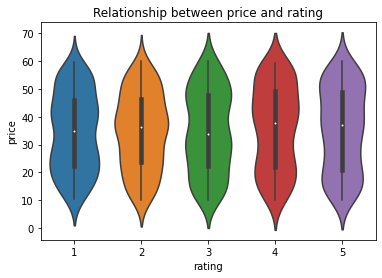

In [19]:
# rating & price
sns.violinplot(x=books_data.rating, y=books_data.price).set_title("Relationship between price and rating")

Text(0.5, 1.0, 'Relationship between rating and inventory')

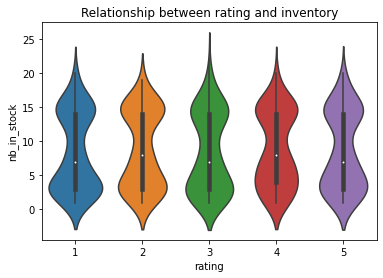

In [20]:
# rating & inventory
sns.violinplot(x=books_data.rating, y=books_data.nb_in_stock).set_title("Relationship between rating and inventory")

The bar chart below demonstrates different rating situations in different categories.

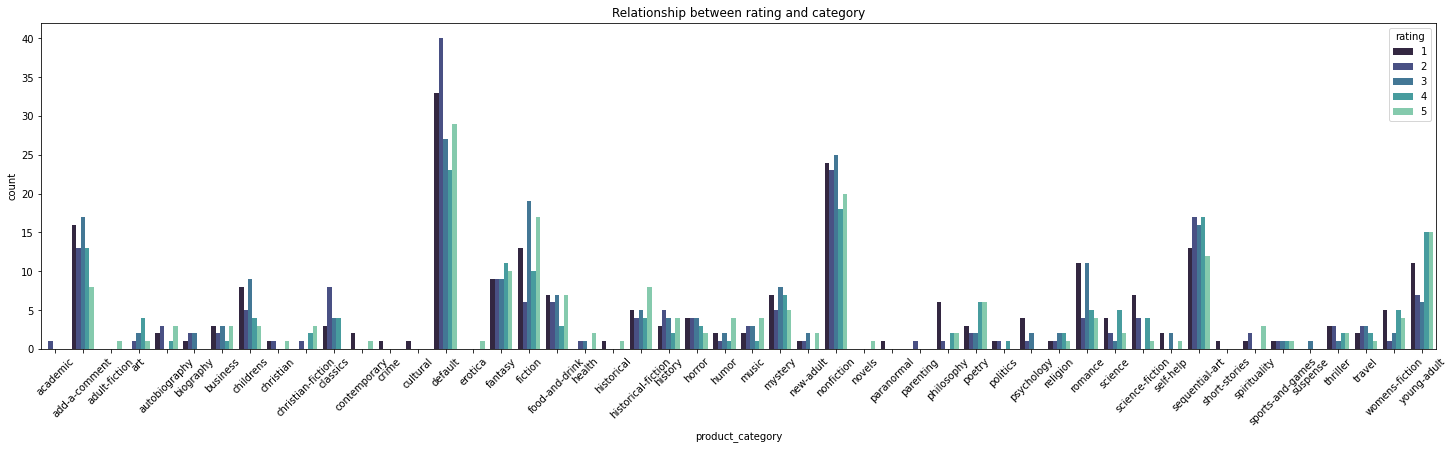

In [21]:
# rating & category
poduct = books_data.groupby('product_category', group_keys=False).apply(lambda s: s.sort_values(by='rating', ascending=True))

fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
cate_rat = sns.countplot(ax=ax, x="product_category", hue="rating", data=poduct, palette='mako')
cate_rat.set_xticklabels(cate_rat.get_xticklabels(), rotation=45)
cate_rat.set_title("Relationship between rating and category")
del poduct

#### The relationship between price and availability

Text(0.5, 1.0, 'The relationship between price and availability')

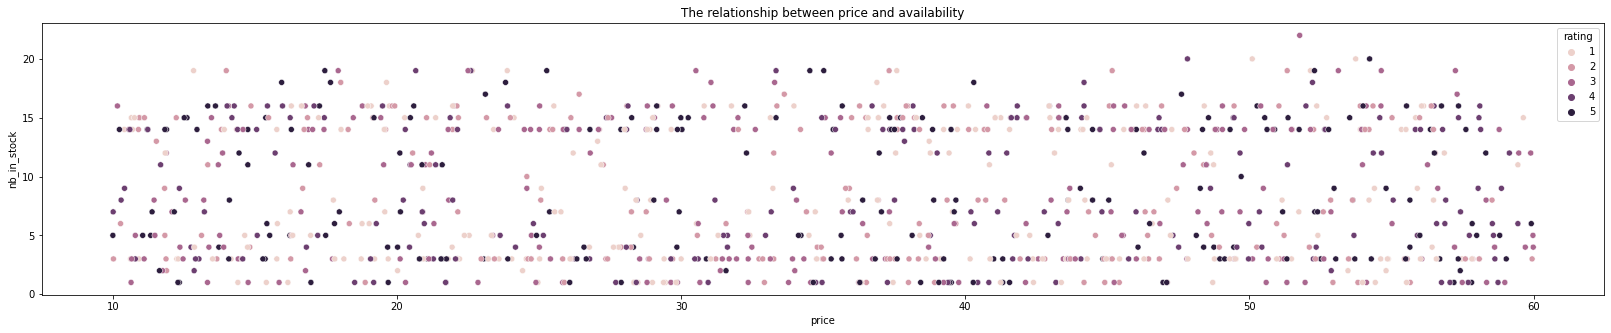

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(28, 5)
pri_stock_fig = sns.scatterplot(ax=ax, data=books_data, x="price", y="nb_in_stock", hue="rating")
pri_stock_fig.set_title("The relationship between price and availability")

#### The relationship between category and availability
The code below counts the inventory of all books in the system, add them to the category corresponding to the inventory, and then calculates the high-rating rate.

In [23]:
# category & rating ratio
cate_dir_sum = {}
cate_dir_5 = {}
cate_list = books_data.product_category.unique().tolist()
for item in cate_list:
    cate_dir_sum[item] = 0
    cate_dir_5[item] = 0

cate_rating_data = books_data[["product_category", "rating"]]
cate_rating_data.sort_values("product_category")
for idx, row in cate_rating_data.iterrows():
    if row['rating'] == 5:
        cate_dir_5[row["product_category"]] = cate_dir_5[row["product_category"]] + 1
    cate_dir_sum[row["product_category"]] = cate_dir_sum[row["product_category"]] + 1
for item in cate_list:
    cate_dir_sum[item] = cate_dir_5[item] / cate_dir_sum[item]
dir_to_csv = pd.DataFrame(list(cate_dir_sum.items()))
dir_to_csv = dir_to_csv.sort_values(1)
print(dir_to_csv)
del cate_list, cate_dir_sum, cate_dir_5, cate_rating_data

                     0         1
49          paranormal  0.000000
45            academic  0.000000
44            classics  0.000000
43            suspense  0.000000
42       short-stories  0.000000
38          psychology  0.000000
37            cultural  0.000000
34           biography  0.000000
31               crime  0.000000
11            politics  0.000000
48           parenting  0.000000
10     science-fiction  0.062500
12              travel  0.090909
16           childrens  0.103448
15             romance  0.114286
27              horror  0.117647
24       add-a-comment  0.119403
18                 art  0.125000
29            religion  0.142857
25             science  0.142857
3              mystery  0.156250
8       sequential-art  0.160000
13            thriller  0.181818
17          nonfiction  0.181818
20          philosophy  0.181818
7              default  0.190789
28           self-help  0.200000
46    sports-and-games  0.200000
23             fantasy  0.208333
4         

The bar chart demonstrates different ratio of high-rating (books with rating = 5/all the books in this category) values in different categories.

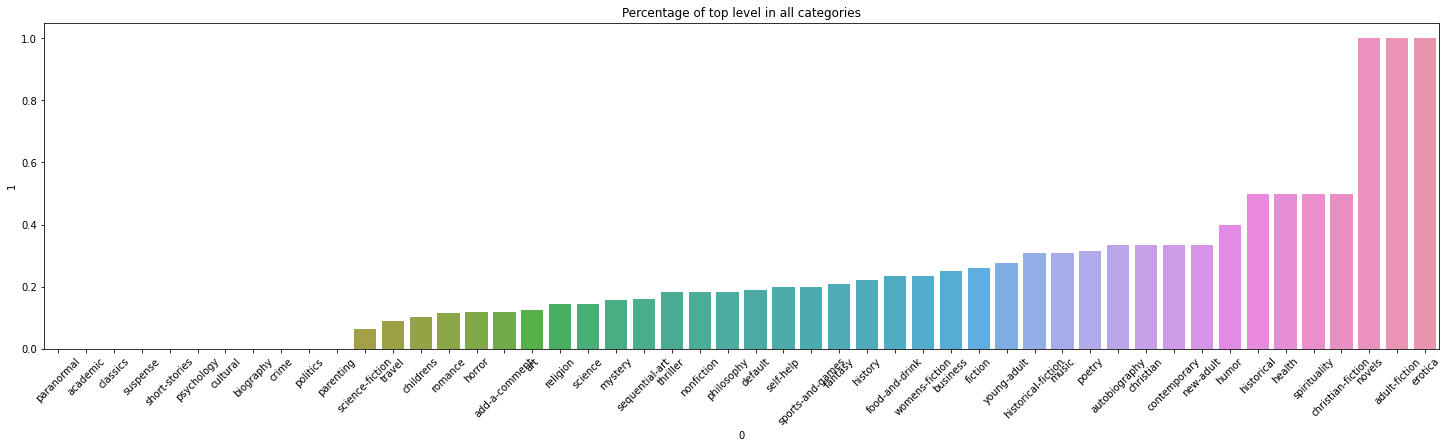

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
cate_rat = sns.barplot(ax=ax, x=0, y=1, data=dir_to_csv)
cate_rat.set_title('Percentage of top level in all categories')
cate_rat.set_xticklabels(cate_rat.get_xticklabels(), rotation=45)
None

del dir_to_csv

# Discussions
A student of INT303 who has 60$ decided to select a high-quantity book based on this EDA notebook:

1. According to **the violin plot of price and rating**, the student knows that the price range of higher-rated books is more densely spread over a range of 50 relative to lower-rated books.
2. According to the plots ' **Relationship between price, rating, and category**, '**Percentage of top level in all categories**,' '**Relationship between rating and category**,' and '**Category VS Inventory**,' the student knows that the more books in stock, the more difficult it is for the highest rated books to appear in the category.
3. According to **the scatter plot of the Relationship between price and availability**, the students know there is no exact relationship between prices and inventories.

Thus, The book should satisfy the following requirement:

1. A rating higher than 4.
2. Cheaper than 55, more expensive than 45.
3. Inventory less than 10. (This would indicate that the book is top-rated, and everyone would buy it.)

With the above charts, the student understands that the five largest categories on this website are default, nonfiction, add a comment, fiction, and young adult.
Furthermore, the most promising categories of high-rated books are health, spirituality, Christina fiction, novels, adult fiction, and erotica.<br>
Thus, the final result should be:

In [25]:
books_data[(books_data.nb_in_stock < 10) & (books_data.rating > 4) & (books_data.price < 55) & (books_data.price > 45) &
           (books_data.product_category != "default") & (books_data.product_category != "nonfiction")
           & (books_data.product_category != "add-a-comment") & (books_data.product_category != "fiction")
           & (books_data.product_category != "young-adult") &
           ((books_data.product_category == "erotica") | (books_data.product_category == "health")
            | (books_data.product_category == "spirituality") | (books_data.product_category == "christian-fiction")
            | (books_data.product_category == "novels") | (books_data.product_category == "adult-fiction"))]

,title,price,nb_in_stock,reviewers_num,rating,product_category,product_type,description,author
430,The Art and Science of Low Carbohydrate Living,52.98,9,0,5,health,Books,The Art And Science Of Low Carbohydrate Living...,"Jeff S. Volek, Stephen D. Phinney"
432,Suzie Snowflake: One beautiful flake (a self-e...,54.81,9,0,5,novels,Books,Follow Suzie on a magical journey of discoveri...,Crystaline Rose


In this way, the student's final choices in the report's results for the Exploratory Data Analysis were **The Art and Science of Low Carbohydrate Living** and **Suzie Snowflake: One beautiful flake (a self-esteem story)**.

### Reference
[1] W. Chai, M. Labbe, and C. Stedman, “What is Big Data Analytics and why is it important?,” SearchBusinessAnalytics, 14-Dec-2021. [Online]. Available: https://www.techtarget.com/searchbusinessanalytics/definition/big-data-analytics. [Accessed: 24-Oct-2022].<br>
[2] S. Few, Show me the numbers: Designing tables and graphs to enlighten. El Dorado Hills, CA: Analytics Press, 2012.<br>
[3] A. C. Müller and S. Guido, Introduction to machine learning with python: A guide for data scientists. Sebastopol: O'Reilly Media, 2018.<br>
[4] G. Li, Foundation of Big Data Analytics: Concepts, Technologies, Methods and Business, 07 2018.<br>
[5] “Violin plot,” Violin Plot, 23-Sep-19AD. [Online]. Available: https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/violplot.htm. [Accessed: 24-Oct-2022].